**Сценарий 1. Компания хочет увеличить количество клиентов с подпиской.**

*Моя цель* — выяснить, какие факторы влияют на подписку, и какие сегменты клиентов наиболее склонны к подписке. В данный момент подписано 387 человек и не подписано 113 человек.

**Что анализирую:**

- Кто чаще подписывается: мужчины или женщины? Молодые или взрослые?

- Влияет ли сегмент покупателя, лояльность на подписку?

- Есть ли связь между покупками и возвратами и подпиской?

**Гипотезы:**

- Клиенты с высоким доходом чаще подписываются.

- Не подписанные покупатели делают больше возвратов.

- Более лояльные клиенты — более склонны к подписке.

In [ ]:
#загрузка файла
from google.colab import files
uploaded = files.upload()

Saving df (1).csv to df (1).csv


In [ ]:
#Импорт библиотек и загрузка данных. Проверка базы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("df (1).csv")
df.head()

,Name,Age,Gender,Country,Approx salary,Spending,Visit Monthly,Ammount of returns,Returns,Refund,Loyalty,Customer Score,Customer Segment,Subscription Status,VIP Channel
0,Client 1,32,Male,Russia,43011,13949,1,1,Yes,2355,Not Loyal,2,B,Yes,No
1,Client 2,62,Female,Kazakhstan,62602,5463,8,2,Yes,3508,Not Loyal,4,C,Yes,No
2,Client 3,37,Female,Belarus,79798,30223,14,2,Yes,6990,Loyal,2,VIP,Yes,Yes
3,Client 4,62,Male,Serbia,101891,3239,7,2,Yes,1979,Not Loyal,4,C,Yes,Yes
4,Client 5,64,Male,Belarus,49213,3710,12,4,Yes,993,Not Loyal,3,C,Yes,No


In [ ]:
#Просмотр базовой информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 500 non-null    object
 1   Age                  500 non-null    int64 
 2   Gender               500 non-null    object
 3   Country              500 non-null    object
 4   Approx salary        500 non-null    int64 
 5   Spending             500 non-null    int64 
 6   Visit Monthly        500 non-null    int64 
 7   Ammount of returns   500 non-null    int64 
 8   Returns              500 non-null    object
 9   Refund               500 non-null    int64 
 10  Loyalty              500 non-null    object
 11  Customer Score       500 non-null    int64 
 12  Customer Segment     500 non-null    object
 13  Subscription Status  500 non-null    object
 14  VIP Channel          500 non-null    object
dtypes: int64(7), object(8)
memory usage: 58.7+ KB


**Заметка и обозначения:**

**Name** - Имя

**Age**  - Возраст

**Gender** - Пол

**Country** - Страна

**Approx salary** - Приблизительная зарплата

**Spending** - Сумма покупок

**Visit Monthly** - Сколько раз за месяц посетили

**Ammount of returns** - Количество возвратов

**Returns**  - да/нет (были ли возвраты)

**Refund**   - сумма возврата

**Loyalty**  - Покатель лояльности

**Customer Score**  - Оценка покупателя по характеристикам: сколько возвратов, сумма покупок, количество посещений

**Customer Segment**  - Сегмент в котором находится покупатель (Вип, А, Б, С)

**Subscription Status**  - да/нет (показатель есть ли подписка)

**VIP Channel**  - да/нет (подписан ли покупатель на канал где мы постим рекламу и акции)

In [ ]:
#Проверка что колонка Subscription Status корректна, без пропусков, и можно сравнивать по ней группы:
df["Subscription Status"].value_counts()

,count
Subscription Status,
Yes,387
No,113


In [ ]:
df["Subscription Status"].unique()


array(['Yes', 'No'], dtype=object)

In [ ]:
#Проверка что колонка Gender корректна, без пропусков, и можно сравнивать по ней группы:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,254
Female,246


In [ ]:
#Проверка что колонка Age корректна и нету странных возрастов как 100 лет или 0
df["Age"].describe()

,Age
count,500.000000
mean,44.232000
std,15.259091
min,18.000000
25%,31.000000
50%,44.000000
75%,58.000000
max,70.000000


In [ ]:
#Проверка на пропущенные значения
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Country,0
Approx salary,0
Spending,0
Visit Monthly,0
Ammount of returns,0
Returns,0
Refund,0


In [ ]:
#Проверка что колонки Customer Segment,Loyalty и VIP Channel корректны:
print(df["Customer Segment"].value_counts())
print(df["Customer Segment"].unique())

print(df["Loyalty"].value_counts())
print(df["Loyalty"].unique())

print(df["VIP Channel"].value_counts())
print(df["VIP Channel"].unique())

Customer Segment
C      174
VIP    151
A       92
B       83
Name: count, dtype: int64
['B' 'C' 'VIP' 'A']
Loyalty
Not Loyal    406
Loyal         94
Name: count, dtype: int64
['Not Loyal' 'Loyal']
VIP Channel
Yes    328
No     172
Name: count, dtype: int64
['No' 'Yes']


In [ ]:
# Проверка есть ли возврат больше покупок
ref_ov_spen = df[df["Refund"] > df["Spending"]]
print(f"Строк с Refund > Spending: {len(ref_ov_spen)}")

Строк с Refund > Spending: 0


Subscription Status  No  Yes
Gender                      
Female               56  190
Male                 57  197


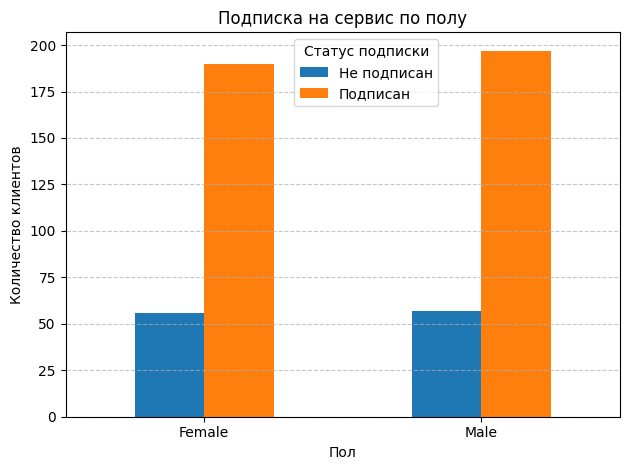

In [ ]:
# Проверки закончены, приступаю к анализу данных
# 1 шаг Сколько мужчин и женщин подписано/не подписано?
gend_sub = df.groupby(["Gender", "Subscription Status"]).size().unstack(fill_value=0)

print(gend_sub)

# Построение столбчатого графика подписки по полу
ax = gend_sub.rename(columns={"Yes": "Подписан", "No": "Не подписан"}).plot(kind='bar', stacked=False)
ax.legend(title="Статус подписки", loc='upper left', bbox_to_anchor=(0.4, 1))
plt.title("Подписка на сервис по полу")
plt.xlabel("Пол")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Из данных видно, что количество подписанных и не подписанных клиентов распределено примерно поровну между мужчинами и женщинами:

Подписанных мужчин — **197**, подписанных женщин — **190**. Не подписанных мужчин — **57**, не подписанных женщин — **56**.

**Вывод:**

Это говорит о том, что пол клиента почти не влияет на вероятность подписки на сервис — мужчины и женщины подписываются с одинаковой вероятностью.

**Рекомендация:**

- Переключить внимание на другие факторы, влияющие на подписку, например, особенности покупательской корзины.

- Провести анализ товаров, приобретаемых подписанными мужчинами и женщинами, чтобы выявить общие предпочтения.

- На основе полученных инсайтов усилить маркетинговые стратегии и персонализацию предложений для не подписанных клиентов.

- Рассмотреть дополнительные рекламные акции и скидки (персональные и массовые), направленные на повышение конверсии.

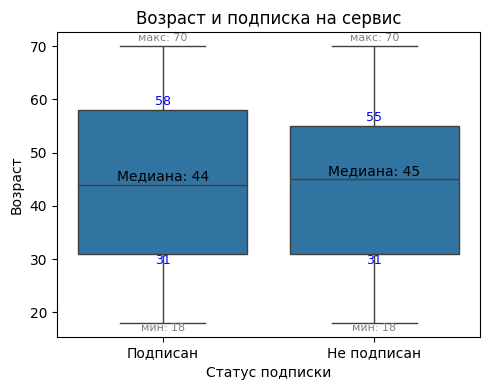

In [ ]:
# Анализ возраста подписанных и неподписанных покупателей
plt.figure(figsize=(5, 4))

order = ["Yes", "No"]
ax = sns.boxplot(x="Subscription Status", y="Age", data=df, order=order)

groups = df.groupby("Subscription Status")["Age"].describe()
labels = {"Yes": "Подписан", "No": "Не подписан"}

for i, label in enumerate(order):
    row = groups.loc[label]

    ax.text(i, row["50%"] + 0.8, f"Медиана: {int(row['50%'])}", ha="center", fontsize=10, color="black")

    ax.text(i, row["25%"] - 2, f"{int(row['25%'])}", ha="center", color="blue", fontsize=9)
    ax.text(i, row["75%"] + 1, f"{int(row['75%'])}", ha="center", color="blue", fontsize=9)

    ax.text(i, row["min"] - 1.5, f"мин: {int(row['min'])}", ha="center", color="gray", fontsize=8)
    ax.text(i, row["max"] + 1, f"макс: {int(row['max'])}", ha="center", color="gray", fontsize=8)

plt.title("Возраст и подписка на сервис")
ax.set_xticks([0, 1])
ax.set_xticklabels([labels[o] for o in order])
plt.xlabel("Статус подписки")
plt.ylabel("Возраст")
plt.tight_layout()
plt.show()

**Возраст и подписка на сервис:**

Возраст клиентов, как подписанных, так и не подписанных, варьируется от 18 до 70 лет.
Медианный возраст у обеих групп примерно одинаковый — около 44 лет, хотя у не подписанных он выше на один год.

Коробка у подписанных клиентов немного шире и тянется до 58 лет, тогда как у не подписанных — до 55 лет.Это может указывать на чуть большее присутствие клиентов старшего возраста среди подписчиков.

**Вывод:**

Подписка на сервис не зависит сильно от возраста — распределения очень похожи.
Однако среди подписанных клиентов наблюдается чуть больший разброс в старшем возрасте.

**Гипотеза для роста подписок:**

Возможно, клиенты старшего возраста охотнее подписываются, потому что хотят сэкономить или получить дополнительную поддержку в следствии:

1) выхода на пенсию и сокращения доходов,

 2) вынужденной потери работы и сокращения доходов.

**Рекомендуется** протестировать отдельные фичи для клиентов 55+ — например, скидки, персональные рекомендации.
Это может помочь увеличить подписку в этом сегменте и перевести часть не подписанных клиентов в подписчиков. А так же привлечь новых клиентов 55+ возраста.

Subscription Status  No  Yes
Customer Segment            
A                     0   92
B                    33   50
C                    80   94
VIP                   0  151


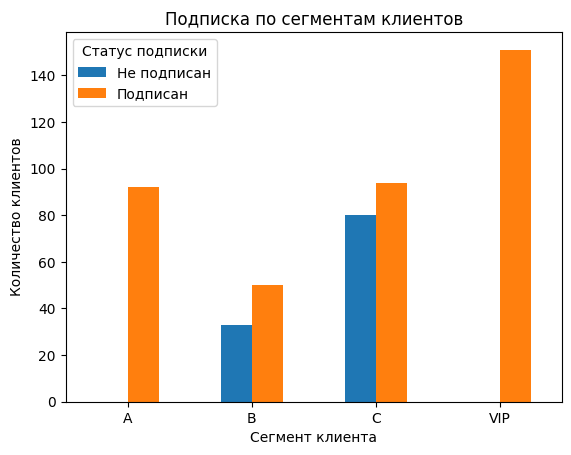

In [ ]:
#Анализ подписки по сегментам клиентов
seg_sub = df.groupby(['Customer Segment', 'Subscription Status']).size().unstack(fill_value=0)
print(seg_sub)

seg_sub.rename(columns={"Yes": "Подписан", "No": "Не подписан"}, inplace=True)
ax = seg_sub.plot(kind='bar', stacked=False)
ax.legend(title="Статус подписки")
plt.title("Подписка по сегментам клиентов")
plt.xlabel("Сегмент клиента")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
plt.show()

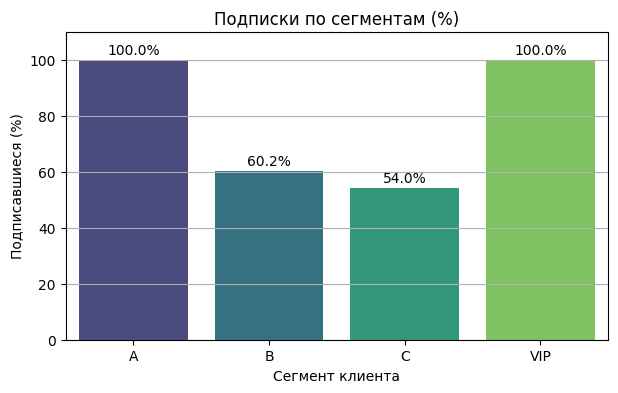

In [ ]:
#Анализ подписки по сегментам клиентов в процентах
seg_sub_pct = df.groupby("Customer Segment")["Subscription Status"].value_counts(normalize=True).unstack(fill_value=0)
seg_sub_pct["Subscribed %"] = seg_sub_pct.get("Yes", 0) * 100

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=seg_sub_pct.index, y=seg_sub_pct["Subscribed %"], hue=seg_sub_pct.index, palette="viridis", legend=False)

for i, value in enumerate(seg_sub_pct["Subscribed %"]):
    ax.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Подписки по сегментам (%)")
plt.ylabel("Подписавшиеся (%)")
plt.xlabel("Сегмент клиента")
plt.ylim(0, 110)
plt.grid(axis="y")
plt.show()

**Сегмент VIP**(Покупки больше 25 тыс) полностью подписан — все 151 клиент имеют подписку. У VIP-клиентов подписка обязательна.

**Сегмент A** (Покупки больше 18 тыс)также показывает 100% подписку (92 из 92), что отлично, потому что подписка не обязательна!

**Сегмент B** (Покупки больше 11 тыс) — из 83 клиентов 50 подписаны, 33 нет. Это около 60% подписанных.

**Сегмент C** (Все остальные) — из 174 клиентов подписаны 94, не подписаны 80, то есть около 54% подписанных.


**Выводы и рекомендации:**

**Сегмент А** — 100% подписчиков. Это те, кто тратит более 18 000 рублей.
Можно сказать политика предоставления скидок и бонусов для этой группы работает отлично — люди с высокими тратами ценят экономию,
 особенно если она идет в комплекте с бонусами, удобством и VIP-обслуживанием. Это “осознанные покупатели”,
 которые думают на перспективу и делают выбор в пользу выгодного сервиса. Эту стратегию точно стоит продолжать.

**Сегмент B** — подписано около 60,2%. Это покупатели с чеком больше 11 000 рублей.
Вижу поле для роста: почти половина еще не подписана. Можно предположить, что это “работяги” или семьи со стабильным, но не высоким доходом.
Они ценят прямую и ощутимую выгоду. Для них хорошо сработают парные предложения, например:
“Купи две упаковки кофе и получи скидку — только для подписчиков”
Или акции вроде “Подпишись и получи дополнительную скидку на любимые товары”. Тут нужно играть на желании сэкономить без потери качества.

**Сегмент C** — подписаны 54% клиентов. Это могут быть:
- люди с низким или нестабильным доходом,
- “залетные” покупатели (редкие визиты),
- или просто клиенты, которых не сильно интересует наш бренд/сервис.

Для привлечения подписчиков считаю что для **сегмента С** важно простое, симпатичное вовлечение. Например:
*“Подпишись — получи брелок для ребенка в подарок”*
или: *бесплатная доставка первого заказа только для подписчиков.* Главный триггер - это возможность сэкономить, а так же "не пыльность":
тоесть что то легко ощутимое, потому что покупатель может просто зайти один раз, и даже такого покупателя нужно привлеч к подписке.


Loyalty    Subscription Status
Loyal      No                      15
           Yes                     79
Not Loyal  No                      98
           Yes                    308
dtype: int64


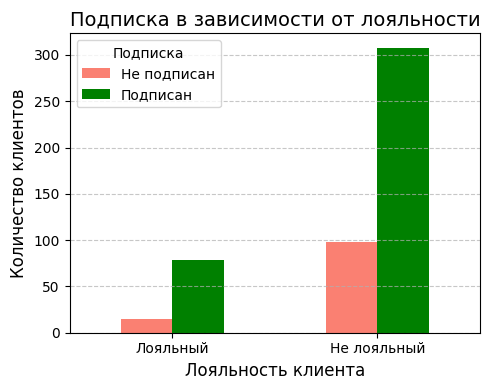

In [ ]:
#Построение графика "подписка в зависимости от лояльности" для анализа
loy_sub_cs = df.groupby(['Loyalty', 'Subscription Status']).size()
print(loy_sub_cs)

pt_loyalty = df.pivot_table(index='Loyalty', columns='Subscription Status', aggfunc='size', fill_value=0)
pi_loyalty = pt_loyalty[['No', 'Yes']]


ax3 = pi_loyalty.rename(columns={"No": "Не подписан", "Yes": "Подписан"}).plot(kind='bar', stacked=False, color=['salmon', 'green'], figsize=(5, 4))
ax3.set_xticklabels(['Лояльный', 'Не лояльный'], rotation=0)
plt.title('Подписка в зависимости от лояльности', fontsize=14)
plt.xlabel('Лояльность клиента', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend(title='Подписка')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

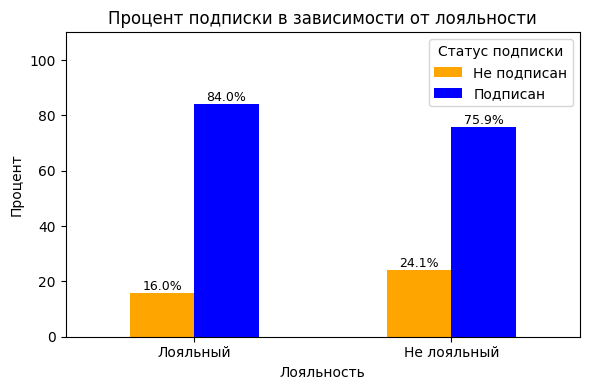

In [ ]:
#Анализ процента подписки в зависимости от лояльности
grouped = df.groupby(['Loyalty', 'Subscription Status']).size().unstack(fill_value=0)

per = grouped.div(grouped.sum(axis=1), axis=0) * 100
per = per.rename(columns={'Yes': 'Подписан', 'No': 'Не подписан'})

ax4 = per.plot(kind='bar', stacked=False, figsize=(6,4), color=['orange', 'blue'])

for p in ax4.patches:
    height = p.get_height()
    if height > 0:
        ax4.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.title('Процент подписки в зависимости от лояльности')
plt.ylabel('Процент')
plt.xlabel('Лояльность')
plt.ylim(0, 110)
plt.xticks(rotation=0)
plt.legend(title='Статус подписки')
ax4.set_xticklabels(['Лояльный', 'Не лояльный'], rotation=0)

plt.tight_layout()
plt.show()

Из графика видно, что процент подписчиков среди лояльных и нелояльных клиентов приблизительно одинаково высокий (84% против 76%).
Это говорит о том, что лояльность не является определяющим фактором при подписке. Подписываются как постоянные клиенты, так и те,
кто не проявляет устойчивой привязанности к бренду.

**Вывод:** Это значит, что текущая маркетинговая кампания по подписке работает стабильно для всех типов клиентов.
Однако, наша цель — увеличить количество подписок.

**Гипотеза** "Более лояльные клиенты — более склонны к подписке": Частично подтверждена, т.к на графике видно что процент лояльных подписаных покупателей выше на 8.1%

**Предложения:**
протестировать универсальную стратегию, ориентированную на обе группы:

"Подпишись сейчас — получи бонус на следующую покупку."

**Выгода для нас:**

 - для новых и случайных клиентов — даст дополнительный стимул прийти еще раз;
 - для уже вовлечённых клиентов — может усилить чувство выгодности и подтолкнуть к следующей покупке.
 - увеличение продаж

In [ ]:
# Анализ как покупательские характеристии влияют на подписку. разделение базы на 2 части: подписанных и не подписанных покупателей
sub_y = df[df["Subscription Status"] == "Yes"]
sub_n = df[df["Subscription Status"] == "No"]

numeric_cols = ["Approx salary", "Spending", "Visit Monthly", "Refund", "Ammount of returns", "Customer Score"]

mean_sub =round(sub_y[numeric_cols].mean(), 2)
print("Средние значения для подписанных 387 клиентов:")
print(mean_sub)

mean_n_sub = round(sub_n[numeric_cols].mean(), 2)
print("Средние значения для НЕподписанных 113 клиентов:")
print(mean_n_sub)

Средние значения для подписанных 387 клиентов:
Approx salary         67905.69
Spending              20174.77
Visit Monthly            10.08
Refund                 8369.16
Ammount of returns        2.45
Customer Score            2.87
dtype: float64
Средние значения для НЕподписанных 113 клиентов:
Approx salary         71319.40
Spending               8750.29
Visit Monthly             9.26
Refund                 3660.59
Ammount of returns        2.39
Customer Score            2.90
dtype: float64


In [ ]:
# Саздание дата фрема чтобы было проще делать графии
df_mean = pd.DataFrame({
    "Subscribed": mean_sub,
    "Not Subscribed": mean_n_sub
})


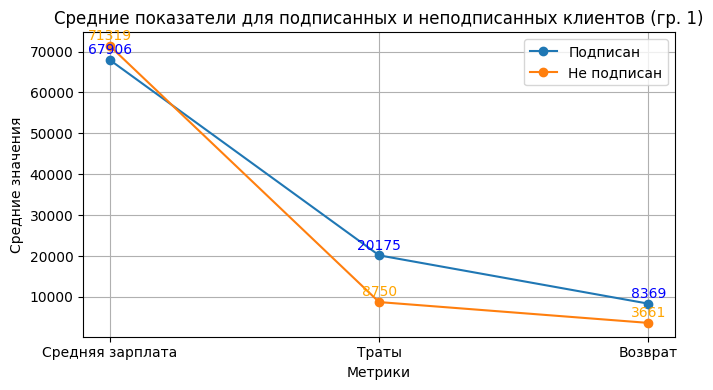

In [ ]:
# Далее создание 2 графиков тк суммы большие а колисчества визитов маленькие. 1й график с большими суммами трат, приблизительной заработной платы и суммы возврата.
# Все в средних показателях
big_metrics = ["Approx salary", "Spending", "Refund"]
metric_labels = ["Средняя зарплата", "Траты", "Возврат"]

df_big = df_mean.loc[big_metrics]

plt.figure(figsize=(7,4))
metrics = df_big.index

plt.plot(metric_labels, df_big["Subscribed"], marker='o', label="Подписан")
plt.plot(metric_labels, df_big["Not Subscribed"], marker='o', label="Не подписан")

for i, metric in enumerate(metric_labels):
    plt.text(i, df_big["Subscribed"][big_metrics[i]] + max(df_big.max())*0.02,
             f"{df_big['Subscribed'][big_metrics[i]]:.0f}", ha='center', color='blue')
    plt.text(i, df_big["Not Subscribed"][big_metrics[i]] + max(df_big.max())*0.02,
             f"{df_big['Not Subscribed'][big_metrics[i]]:.0f}", ha='center', color='orange')

plt.title("Средние показатели для подписанных и неподписанных клиентов (гр. 1)")
plt.xlabel("Метрики")
plt.ylabel("Средние значения")
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Вывод:**

Подписанные клиенты тратят в среднем в 2.3 раза больше (20,175 руб. против 8,750 руб.), хотя их предположительная средняя зарплата немного ниже (67,906 против 71,319 руб.).
Это говорит о том, что подписка скорее привлекает тех, кто активно покупает, а не обязательно самых обеспеченных.


Количество возвратов указывает что подписанные покупатели возвращают товары чаще,  в 2,29 раза! Это может говорить о том, что они чувствую себя более
уверенно с нами, а так же что неподписанные покупатели не хотят идти в магазин ради возвратов.

**Гипотеза** "Не подписанные покупатели делают больше возвратов" - не верна. как видно из графика, подписанные клиенты совершают больше возвратов.

**Гипотеза** "Клиенты с высоким доходом чаще подписываются" - не верна. Как видно из графика - не подписанные клиенты имеют больший доход чем подписаные.

**Значения для бизнеса:**

- Клиенты с высоким уровнем трат более склонны подписываться на сервис, вероятно, потому что видят в подписке выгоду для себя.
- Чтобы увеличить количество подписок, стоит сфокусироваться на стимулировании клиентов со средними тратами (сейчас у неподписанных средний чек значительно ниже).
- Внедрение акций и персональных предложений, могут повысить и смотивировать клиентов с низкими тратами повысить
активность и подписаться (например, бонусы за подписку или скидки на повторные покупки).
- Есть вероятность, что неподписанные покупатели не знаю о пользе подписки. Так же стоит информировать залетных покупателей о выгоде подписаться.


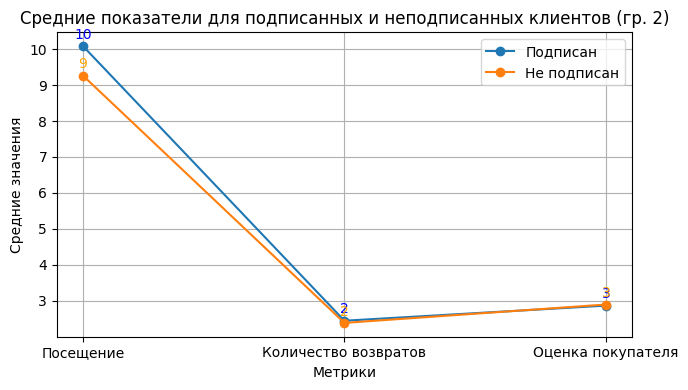

In [ ]:
# График 2й показывает такие средние метрики как: ежемесячное посещение, количество возвратов за месяц и покупательская оценка
small_metrics = ["Visit Monthly", "Ammount of returns", "Customer Score"]
metric_labels = ["Посещение", "Количество возвратов", "Оценка покупателя"]

df_small = df_mean.loc[small_metrics]

plt.figure(figsize=(7,4))
metrics = df_small.index

plt.plot(metric_labels, df_small["Subscribed"], marker='o', label="Подписан")
plt.plot(metric_labels, df_small["Not Subscribed"], marker='o', label="Не подписан")

for i, metric in enumerate(metric_labels):
    plt.text(i, df_small["Subscribed"][small_metrics[i]] + max(df_small.max())*0.02,
             f"{df_small['Subscribed'][small_metrics[i]]:.0f}", ha='center', color='blue')
    plt.text(i, df_small["Not Subscribed"][small_metrics[i]] + max(df_small.max())*0.02,
             f"{df_small['Not Subscribed'][small_metrics[i]]:.0f}", ha='center', color='orange')

plt.title("Средние показатели для подписанных и неподписанных клиентов (гр. 2)")
plt.xlabel("Метрики")
plt.ylabel("Средние значения")
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Выводы по малым метрикам:**

 - Количество визитов в месяц у подписанных клиентов немного выше (примерно 10 раз), чем у неподписанных (около 9),что говорит о том, что подписка связана с более активным посещением магазина.

 - Среднее количество возвратов у подписанных чуть выше — около 2.5 против 2.4 у неподписанных. Это может означать, что наличие подписки не сильно влияет на количество возвратов.
 - Оценка поведения клиента практически одинакова у обеих групп, что указывает, что качество и ценность клиента для бизнеса примерно не зависят от подписки.

Подписка может мотивировать клиентов быть более активными и лояльными (чаще приходить и возвращать товары при необходимости),
что в целом полезно для удержания и удовлетворенности и поддержания возврата клиента обратно в магазин.
 Похожий уровень Оценки покупателя говорит, что потенциально можно нацеливаться и на неподписанных с похожими клиентскими характеристиками, предлагая им привлекательные бонусы для подписки.



#  Итоговый бизнес-вывод и рекомендации

## Общие наблюдения:

- **Подписка** чётко коррелирует с уровнем трат: средний чек подписанных клиентов в **2.3 раза выше**, чем у неподписанных.
- **Сегмент A и VIP** (чек > 18 000 ₽ и > 25 000 ₽) демонстрируют **100% подписку** — подписка воспринимается как логичное и выгодное дополнение.
- В **сегментах B и C** (чек < 18 000 ₽) уровень подписки составляет **60.2% и 54%** соответственно — здесь есть потенциал роста.
- Подписанные клиенты совершают больше возвратов, что указывает на **более тесную вовлечённость** и доверие к сервису.
- **Возраст** и **пол** оказывают незначительное влияние на подписку. Слабо выраженное преимущество есть у клиентов старше 55 лет.
- **Лояльные клиенты** подписываются на 8.1% чаще, но разница недостаточна, чтобы считать лояльность ключевым фактором.

---

## Рекомендации по сегментам:

### 🔷 Сегмент B (чек 11 000–18 000 ₽, подписка — 60.2%)
- Внедрить **стимулирующие акции**:  
  – «Подпишись — получи скидку на следующую покупку»  
  – «Парные предложения» (например: «купи 2 — получи скидку, если подписан»)

- Использовать **персонализированные уведомления**:  
  – «Экономия для вас — уже в подписке»

### 🔶 Сегмент C (чек < 11 000 ₽, подписка — 54%)
- Протестировать **"простые триггеры" вовлечения**:  
  – подарок за подписку (брелок, стикеры, скидка на первый заказ)  
  – подсветка выгоды в цифрах: «экономия в год — до 5 000 ₽»

- Упростить процесс оформления:  
  – подписка в один клик (телефон + имя)

---

## Общие рекомендации:

- **Коммуникация преимуществ**: чётко показывать экономию, бонусы и удобство.
- **Визуальные и физические триггеры**: постеры у входа, карточки на кассе, баннеры в приложении.
- **Поддержка возвратов**: сформулировать политику возврата для подписчиков как преимущество.
- **Нацеливание на неподписанных, но активных**: использовать похожие поведенческие паттерны.

---

## Финальный вывод:

Модель подписки работает особенно эффективно с клиентами среднего и высокого уровня трат. Основной потенциал для роста — в сегментах B и C, где можно развернуть адресные маркетинговые кампании. Дополнительно стоит повысить информированность клиентов о выгоде и упростить процедуру подписки.